In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model



print(tf.__version__)
data_dir = r"..\Datad"

batch_size = 32
img_height = 128
img_width = 128

2.10.0


In [2]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
       "Datad",
       validation_split=0.2,
       subset="training",
       seed=123,
       image_size=(img_height, img_width),
       batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
     "Datad",
     validation_split=0.2, 
     subset = "validation", 
     seed=123,
     image_size=(img_height, img_width),
     batch_size=batch_size)

Found 2151 files belonging to 3 classes.
Using 1721 files for training.
Found 2151 files belonging to 3 classes.
Using 430 files for validation.


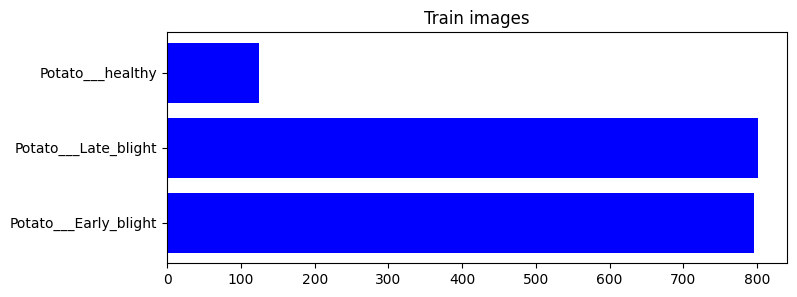

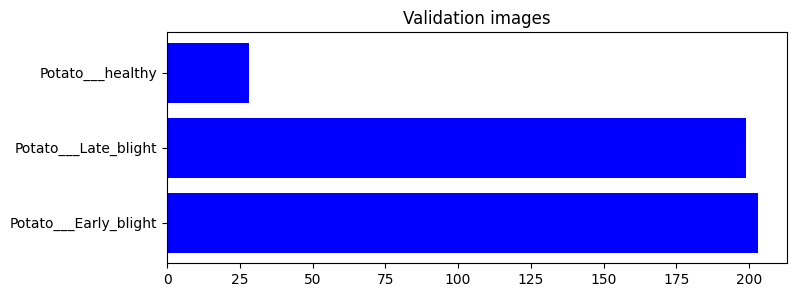

In [3]:
def plot_distribution (y, title):
 a = Counter (y)
 y = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
 x = [a[i] for i in range(3)] 
 plt.figure(figsize=(8, 3)) 
 plt.barh(y, x, color='blue') 
 plt.title(title)
 return plt.show()

y_train = np.concatenate([y for x, y in train_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)
plot_distribution (y_train, title="Train images") 
plot_distribution (y_val, title = "Validation images")

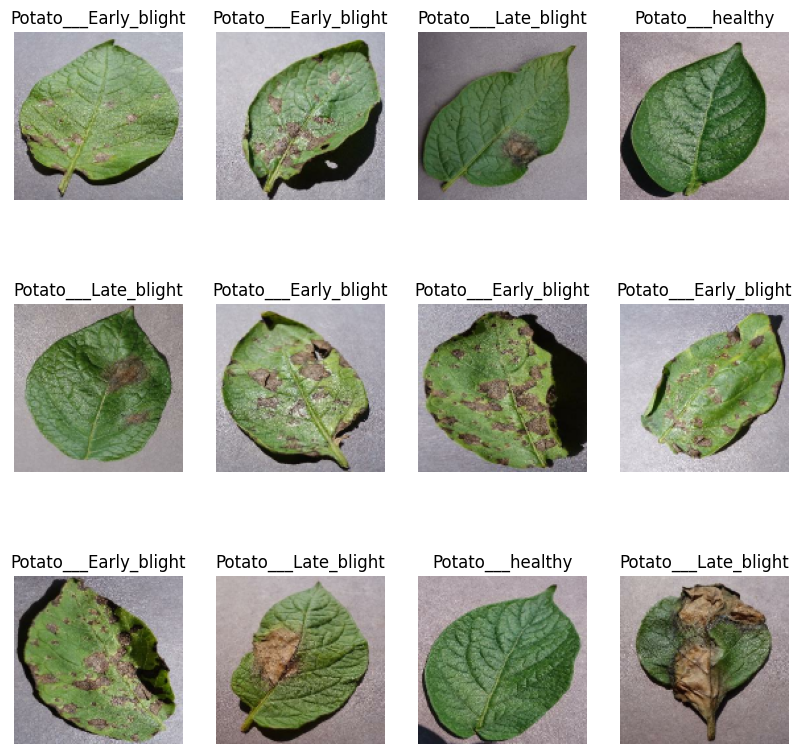

In [4]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i +1 )
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [5]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE) 
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
import tensorflow as tf

import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
base_model = tf.keras.applications.VGG19(
weights="imagenet", 
include_top=False,
input_shape=(img_height,img_width, 3))

base_model.trainable=False

num_classes = 3
model = tf.keras.Sequential([
     base_model,
                
  # tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
 # tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
#
  #  tf.keras.layers.Conv2D(16, 3, activation='relu',padding='same'),
   # tf.keras.layers. MaxPooling2D(),

    #tf.keras.layers.Conv2D(32,3, activation="relu" ,padding='same'),
    # tf.keras.layers.MaxPooling2D(),

  # tf.keras.layers.Conv2D(64,3, activation='relu',padding='same' ), 
 # tf.keras.layers.MaxPooling2D(),

     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense (128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
     tf.keras.layers.Dense(num_classes, activation="softmax")
])

model.compile(optimizer ="adam",
              loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

earlystop_callback = tf.keras.callbacks.EarlyStopping (monitor='val_accuracy',
                                                       min_delta=0.0001,
                                                       patience=5)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=5, 
                    callbacks=[earlystop_callback])

198551472/198551472 [==============================] - 96s 0us/step
Epoch 1/20
54/54 [==============================] - 534s 10s/step - loss: 0.7215 - accuracy: 0.8385 - val_loss: 0.1385 - val_accuracy: 0.9558
Epoch 2/20
54/54 [==============================] - 535s 10s/step - loss: 0.1916 - accuracy: 0.9198 - val_loss: 0.0816 - val_accuracy: 0.9767
Epoch 3/20
54/54 [==============================] - 564s 10s/step - loss: 0.1223 - accuracy: 0.9553 - val_loss: 0.0813 - val_accuracy: 0.9744
Epoch 4/20
54/54 [==============================] - 522s 10s/step - loss: 0.1097 - accuracy: 0.9541 - val_loss: 0.0603 - val_accuracy: 0.9791
Epoch 5/20
54/54 [==============================] - 544s 10s/step - loss: 0.0952 - accuracy: 0.9663 - val_loss: 0.0694 - val_accuracy: 0.9744
Epoch 6/20
54/54 [==============================] - 537s 10s/step - loss: 0.0710 - accuracy: 0.9680 - val_loss: 0.0495 - val_accuracy: 0.9814
Epoch 7/20
54/54 [==============================] - 528s 10s/step - loss: 0.0569

KeyboardInterrupt: 

In [8]:
train_loss = history.history["loss"]
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history["val_accuracy"]

# Accuracy plots
plt.figure(figsize=(8, 4))
plt.plot(train_acc, color='green', linestyle='-', label='train accuracy')
plt.plot(valid_acc, color="blue", linestyle='-' ,label='val accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#loss plots
plt.figure(figsize=(8, 4)) 
plt.plot(train_loss, color ='orange', linestyle='-', label= 'train loss') 
plt.plot(valid_loss, color='red', linestyle="-", label='val loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()


loss, acc = model.evaluate(val_ds, batch_size=batch_size) 
print("validation accuracy :", round (acc, 2)) 
print("validation loss :", round (loss,2))

NameError: name 'history' is not defined

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_small (Functional)  (None, 4, 4, 768)        49454688  
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 128)               1572992   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 51,028,067
Trainable params: 1,573,379
Non-trainable params: 49,454,688
_________________________________________________________________


In [10]:
y_pred = [] 
y_true = []

for image_batch, label_batch in val_ds: 
 
   y_true.append(label_batch)
   preds = model.predict(image_batch)
   y_pred.append(np.argmax(preds, axis= - 1))


correct_labels = tf.concat([item for item in y_true], axis = 0) 
predicted_labels = tf.concat([item for item in y_pred], axis= 0)
model.save("../transfer learning project/model/model_convonextsmall.h5")

1/1 [==============================] - 7s 7s/step


In [ ]:
import pandas as pd
cm=confusion_matrix(correct_labels,predicted_labels)
cm_df=pd.DataFrame(cm,index=class_names,columns=class_names)
print(cm_df)



                       Potato___Early_blight  Potato___Late_blight  \
Potato___Early_blight                    202                     1   
Potato___Late_blight                       8                   191   
Potato___healthy                           0                    26   

                       Potato___healthy  
Potato___Early_blight                 0  
Potato___Late_blight                  0  
Potato___healthy                      2  


In [ ]:
print (classification_report(correct_labels,predicted_labels))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       203
           1       0.88      0.96      0.92       199
           2       1.00      0.07      0.13        28

    accuracy                           0.92       430
   macro avg       0.95      0.68      0.68       430
weighted avg       0.92      0.92      0.89       430



In [ ]:
def prediction (img):
    class_names= ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

    my_image = load_img(img, target_size=(img_height, img_width))
    my_image= img_to_array(my_image)
    my_image = np.expand_dims (my_image, 0)

    out = np.round(model.predict(my_image)[0], 2)
   # fig = plt.figure(Figsize=(1, 1))
    plt.barh(class_names, out, color="yellow", edgecolor="red", linewidth=1, height=0.5)

    for index, value in enumerate(out):
        plt.text(value/2 + 0.1, index, f"{100*value:.2f}%", fontweight='bold')
    plt.xticks([])
    plt.yticks([0, 1, 2], labels=class_names, fontweight='bold', fontsize=14)
        #fig.savefig("download.jpg", bbox_inches='tight')
    return plt.show()


1/1 [==============================] - 0s 93ms/step


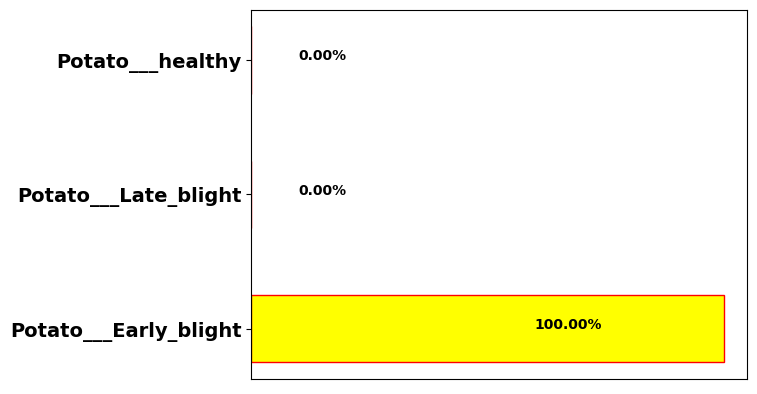

In [ ]:
img=r"D:\final\Dtest.jpg"
prediction(img)

1/1 [==============================] - 0s 84ms/step


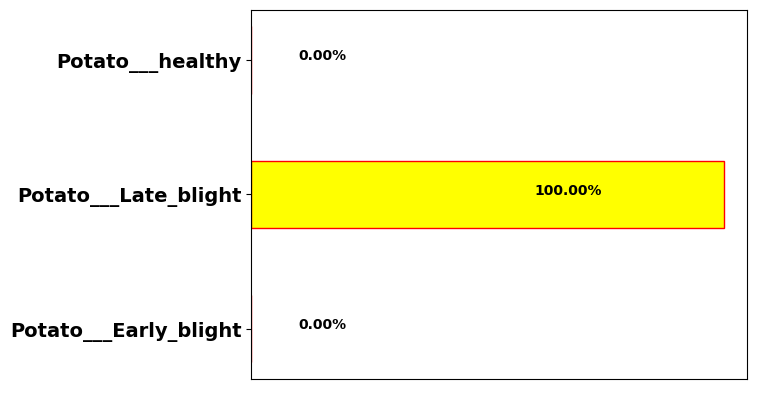

In [ ]:
img=r"D:\final\late.JPG"
prediction(img)


In [ ]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4755766460523682077
xla_global_id: -1
]


In [ ]:

import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]